In [25]:
from matplotlib import pyplot as plt
from scipy.signal import lfilter, savgol_filter
from tqdm import tqdm
import pandas as pd
import numpy as np
import json
import os


In [32]:

path = os.path.dirname(os.path.abspath('')) + '/src/logs/carracing/'
list_dir = ['vae/avg_test_loss.json', 'vae/avg_train_loss.json']


In [33]:
n = 100  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

In [28]:
color = {0: 'firebrick', 1: 'tomato', 2: 'peru', 3: 'gold', 4: 'dodgerblue', 5: 'springgreen', 6: 'indigo', 7: 'deeppink'}


100%|██████████| 2/2 [00:00<00:00, 57.12it/s]


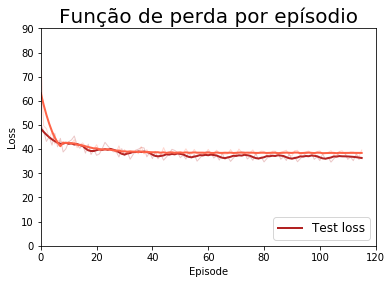

In [81]:
plt.figure()
labels = ['Test loss', 'Train loss']
for c, directory in tqdm(enumerate(list_dir), total=len(list_dir)):
    with open(path+directory) as f:
        data = json.load(f)


    
    y = pd.DataFrame(data).iloc[:, 2].to_numpy()
    
    episodes = np.arange(len(y))
    smooth = savgol_filter(y,window_length = 15, polyorder = 2)
    
    
    plt.title('Função de perda por epísodio', size=20)
    plt.legend(loc=4, prop={'size': 12})
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.xlim([0, 120])
    plt.ylim([0, 90])
    plt.plot(episodes, smooth, color=color[c], linestyle='-', linewidth=2, label=labels[c])
    plt.plot(episodes, y, color=color[c], linestyle='-', linewidth=1, alpha=0.25)  # label='Real Rewards' 
    
    


No handles with labels found to put in legend.


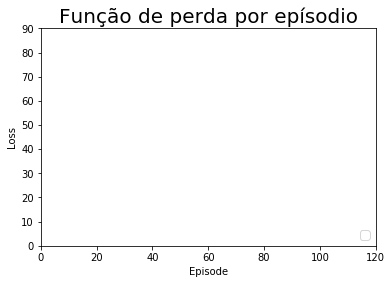

In [63]:
plt.title('Função de perda por epísodio', size=20)
plt.legend(loc=4, prop={'size': 12})
plt.xlabel('Episode')
plt.ylabel('Loss')
plt.xlim([0, 120])
plt.ylim([0, 90])
plt.show()